# Introduction

When it comes to Machine Learning, or even Deep Learning, how the data is processed is fundamental to the model's training and testing performance. When working in the domain of audio, there are a few steps to understand before getting to this stage, but once you get there, learning from audio becomes a quite easy task. Make sure to understand the concepts linked below before going through this article.

In this article I aim to break down what exactly a spectrogram is, how it is used in the field Machine Learning, and how you can use them for whatever problem you are attempting to solve.

# What is a Spectrogram?

You can think of spectrograms as pictures of audio. Kind of weird, I know, but you should strengthen this intuition as much as you can. The spec portion in spectrogram comes from spectrum and the color-bar you see on the right of the figure is just that. With all of this information in mind, let me formalize the definition. **A spectrogram is a figure which represents the spectrum of frequencies of a recorded audio over time.**

This means that as we get brighter in color in the figure, the sound is heavily concentrated around those specific frequencies, allowing us to get a good understanding of the shape and structure of the audio without even listening to it! This is where the power of spectrograms come into play for various ML/DL models.

# How to Create Spectrograms

Now a question arises, how do we calculate the spectrograms? The answer to this question is much simpler than expected.

- Split the audio into overlapping chunks, or windows.
- Perform the Fourier Transformation on each window.
- Each resulting window has a vertical line representing the magnitude vs frequency.
- Take the resulting window and convert to decibels. This gives us a rich image of the sound's structure.
- Finally, we lay out these windows back into the length of the original song and display the output.

Now that we have a decent understanding of what spectrograms are exactly, let's learn how to retrieve them from sounds in Python! Using functions in `librosa`, we can have this be done for us with little to no effort.

First, let's import the needed packages and load in the audio.

In [1]:
%matplotlib inline
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
# Load in sounds
rb, sr = librosa.load('snippets/rb.wav')
rap, _ = librosa.load('snippets/rap.wav')
rock, _ = librosa.load('snippets/rock.wav')

Second, I am going to define two functions; one that will perform all the necessary steps and output the processed signal, and another that will plot the spectrogram. Make sure to read through the comments and lines to understand the process in which this is done.

In [2]:
def to_decibles(signal):
    # Perform short time Fourier Transformation of signal and take absolute value of results
    stft = np.abs(librosa.stft(signal))
    # Convert to dB
    D = librosa.amplitude_to_db(stft, ref = np.max) # Set reference value to the maximum value of stft.
    return D # Return converted audio signal

# Function to plot the converted audio signal
def plot_spec(D, sr, genre):
    fig, ax = plt.subplots(figsize = (30,10))
    spec = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear', ax=ax)
    ax.set(title = 'Spectrogram of ' + genre)
    fig.colorbar(spec)

Now, with our functions defined, we can simply use `plot_spec` to graph the results!

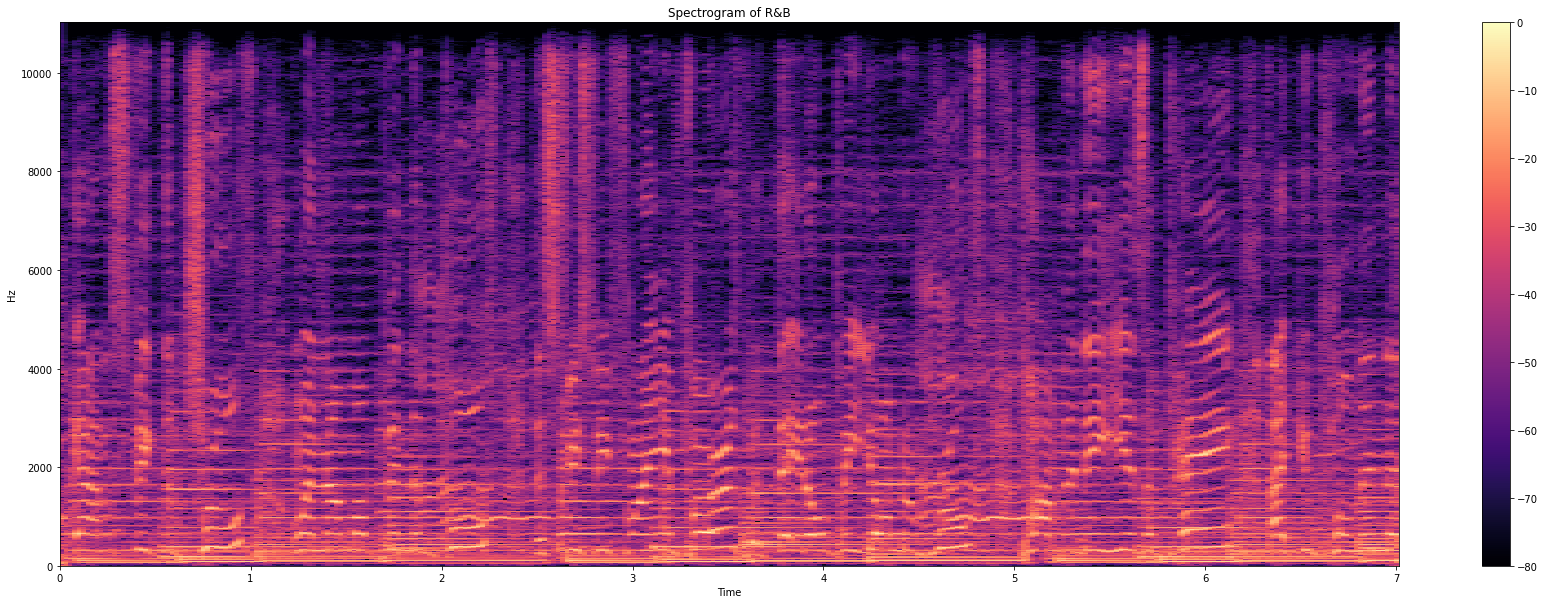

In [3]:
plot_spec(to_decibles(rb), sr, 'R&B')

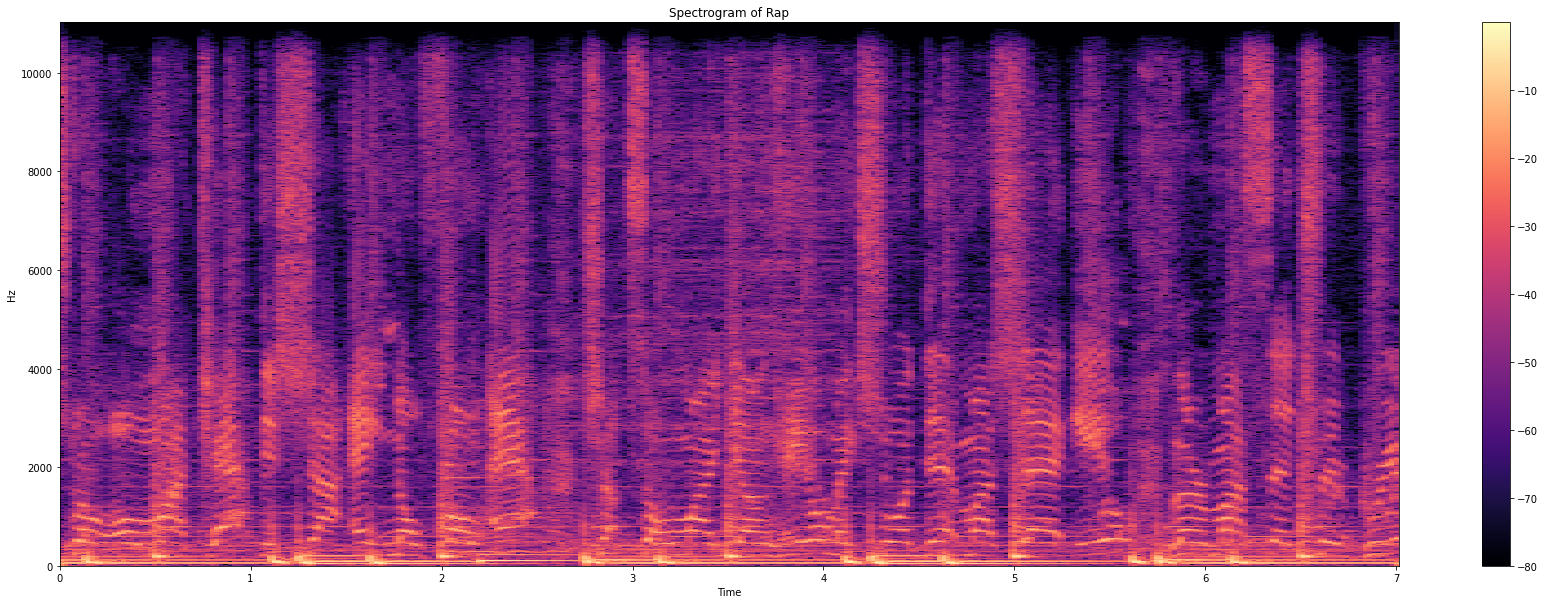

In [4]:
plot_spec(to_decibles(rap), sr, 'Rap')

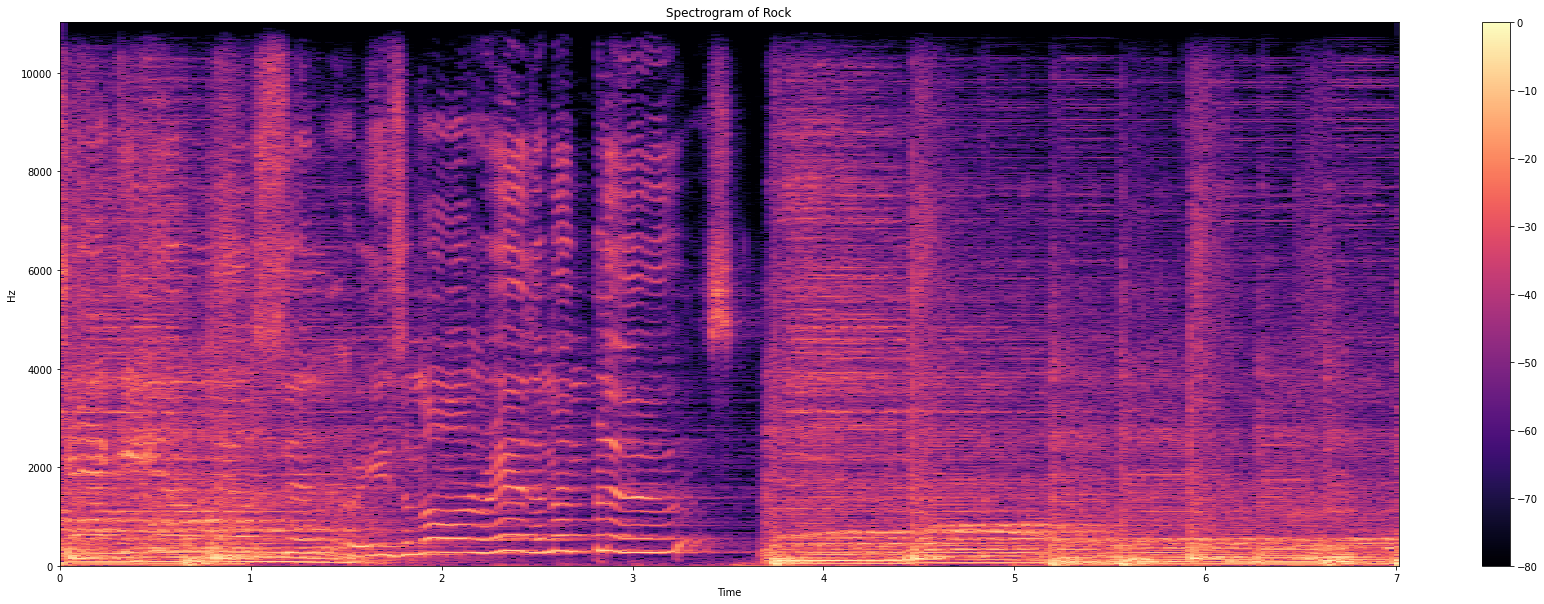

In [5]:
plot_spec(to_decibles(rock), sr, 'Rock')

# Conclusion

By now, you should be able to understand how spectrograms are created using the Short Time Fourier Transformation, as well as how to create them in Python. These representations of audio allow for various Deep Learning architectures to extract features much easier than wave form and even Fourier representations.